# Pandas => DataFrames for dummies

In [1]:
import pandas as pd
import numpy as np

## The DATAFRAME datastructure

Basically just like an excel tabular datastructure

rows, columns (Series) & indices

### Just like numpy the api is gigantic

Like many other libraries, it is based on numpy

In [2]:
# there are many ways of creating dataframes
dataframe = pd.read_csv("../data/btc.csv")
dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [3]:
dataframe.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2635,2021-12-08,50667.648438,51171.375000,48765.988281,50504.796875,50504.796875,28479699446
2636,2021-12-09,50450.082031,50797.164063,47358.351563,47672.121094,47672.121094,29603577251
2637,2021-12-10,47642.144531,50015.253906,47023.699219,47243.304688,47243.304688,30966005122
2638,2021-12-11,47264.632813,49458.210938,46942.347656,49362.507813,49362.507813,25775869261
2639,2021-12-12,49402.859375,49916.507813,48729.335938,49765.156250,49765.156250,21695815680


In [4]:
dataframe.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2.640000e+03
mean,10474.121920,10763.004048,10157.666271,10490.973819,10490.973819,1.419610e+10
std,15443.860296,15874.466663,14951.052594,15457.638141,15457.638141,1.994941e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,587.575256,592.518265,581.373977,587.795273,587.795273,7.594447e+07
50%,5930.529297,6181.519532,5736.933106,5940.194824,5940.194824,4.792940e+09
75%,10117.428466,10295.944580,9734.994629,10120.269287,10120.269287,2.336638e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


### access the types

In [5]:
dataframe.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

### show the columns

In [6]:
dataframe.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

### look at the index

In [7]:
dataframe.index

RangeIndex(start=0, stop=2640, step=1)

### fix the date being a string => make it an actual date

In [8]:
dataframe["Date"] = pd.to_datetime(dataframe["Date"], format=r"%Y-%m-%d")
dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


### try using the str functions to lower case the columns names, replace spaces by underscores

In [9]:
dataframe.columns = dataframe.columns.str.lower().str.split(" ").str.join("_")

In [10]:
dataframe.head()

,date,open,high,low,close,adj_close,volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [11]:
type(dataframe["open"])

pandas.core.series.Series

In [12]:
type(dataframe["open"].values)

numpy.ndarray

### use the open and close series to get the avg value each day

In [13]:
avg = (dataframe["open"] + dataframe["close"]) / 2
avg

0         461.599015
1         440.649993
2         409.449494
3         401.788498
4         403.453003
            ...     
2635    50586.222657
2636    49061.101562
2637    47442.724610
2638    48313.570313
2639    49584.007812
Length: 2640, dtype: float64

### get some stats (median, percentiles, mean, count, sum etc...) from avg and dataframe using one liners

In [14]:
avg.describe()

count     2640.000000
mean     10482.547870
std      15446.142137
min        193.370498
25%        587.854744
50%       6011.050781
75%      10101.651123
max      67260.781250
dtype: float64

In [15]:
dataframe.describe()

,open,high,low,close,adj_close,volume
count,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2.640000e+03
mean,10474.121920,10763.004048,10157.666271,10490.973819,10490.973819,1.419610e+10
std,15443.860296,15874.466663,14951.052594,15457.638141,15457.638141,1.994941e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,587.575256,592.518265,581.373977,587.795273,587.795273,7.594447e+07
50%,5930.529297,6181.519532,5736.933106,5940.194824,5940.194824,4.792940e+09
75%,10117.428466,10295.944580,9734.994629,10120.269287,10120.269287,2.336638e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


### get the correlations betweeen series in one line

In [16]:
dataframe.corr()

,open,high,low,close,adj_close,volume
open,1.000000,0.999522,0.999057,0.998807,0.998807,0.747125
high,0.999522,1.000000,0.999013,0.999479,0.999479,0.750493
low,0.999057,0.999013,1.000000,0.999386,0.999386,0.739656
close,0.998807,0.999479,0.999386,1.000000,1.000000,0.745845
adj_close,0.998807,0.999479,0.999386,1.000000,1.000000,0.745845
volume,0.747125,0.750493,0.739656,0.745845,0.745845,1.000000


### Let's make it more interesting

### Using the available pandas functions : on each day determine if the close price went up or down compared to the last

Create a new column "up" filled with boolean values True is the price goes up False otherwise

In [17]:
dataframe["stonks"] = dataframe["close"] > dataframe["close"].shift(1)

In [18]:
%%timeit

d = {}
for i in dataframe["stonks"].values:
    if i in d.keys():
        d[i] = d[i] + 1
    else:
        d[i] = 1

d

889 µs ± 52.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### count how many time the value goes up/down using the pandas api

In [19]:

dataframe["stonks"].value_counts(dropna=False)

True     1434
False    1206
Name: stonks, dtype: int64

### Now lets determine the gains / losses when the price has gone up / down using the close series

In [20]:
dataframe["gains"] = dataframe["close"] - dataframe["close"].shift(1)

In [21]:
dataframe["gains"].describe()

count    2639.000000
mean       18.684283
std       752.396488
min     -7554.039063
25%       -38.272522
50%         1.794007
75%        70.932373
max      7293.023438
Name: gains, dtype: float64

### plot the series in one line

<AxesSubplot:>

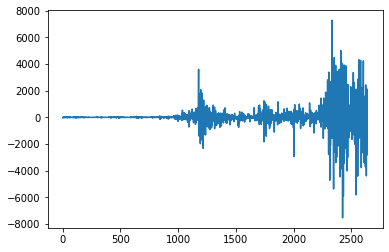

In [22]:
dataframe["gains"].plot()
# fweoifjweoifjwo

foiweufowiefjwoifjweoifw


### plot a histogram of the gains

<AxesSubplot:>

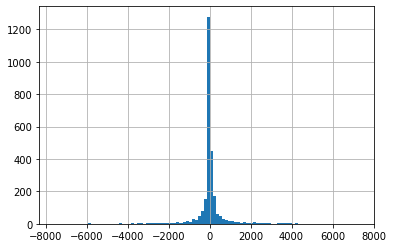

In [23]:
dataframe["gains"].hist(bins=100)

### select the lines where gains are over 100 using:

    - masks
    - query

In [24]:
mask = dataframe["gains"] > 100
dataframe[mask]

,date,open,high,low,close,adj_close,volume,stonks,gains
840,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984,True,110.890014
964,2017-05-08,1596.920044,1723.349976,1596.920044,1723.349976,1723.349976,1340320000,True,126.640015
973,2017-05-17,1726.729980,1864.050049,1661.910034,1839.089966,1839.089966,1064729984,True,104.640015
978,2017-05-22,2043.189941,2303.899902,2017.869995,2173.399902,2173.399902,1942220032,True,132.199951
979,2017-05-23,2191.560059,2320.820068,2178.500000,2320.419922,2320.419922,1378749952,True,147.020020
...,...,...,...,...,...,...,...,...,...
2632,2021-12-05,49201.519531,49768.148438,47857.496094,49368.847656,49368.847656,37198201161,True,168.144531
2633,2021-12-06,49413.480469,50929.519531,47281.035156,50582.625000,50582.625000,37707308001,True,1213.777344
2634,2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,50700.085938,33676814852,True,117.460938
2638,2021-12-11,47264.632813,49458.210938,46942.347656,49362.507813,49362.507813,25775869261,True,2119.203125


In [25]:
dataframe.shape

(2640, 9)

In [26]:
dataframe.query("gains > 100")

,date,open,high,low,close,adj_close,volume,stonks,gains
840,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984,True,110.890014
964,2017-05-08,1596.920044,1723.349976,1596.920044,1723.349976,1723.349976,1340320000,True,126.640015
973,2017-05-17,1726.729980,1864.050049,1661.910034,1839.089966,1839.089966,1064729984,True,104.640015
978,2017-05-22,2043.189941,2303.899902,2017.869995,2173.399902,2173.399902,1942220032,True,132.199951
979,2017-05-23,2191.560059,2320.820068,2178.500000,2320.419922,2320.419922,1378749952,True,147.020020
...,...,...,...,...,...,...,...,...,...
2632,2021-12-05,49201.519531,49768.148438,47857.496094,49368.847656,49368.847656,37198201161,True,168.144531
2633,2021-12-06,49413.480469,50929.519531,47281.035156,50582.625000,50582.625000,37707308001,True,1213.777344
2634,2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,50700.085938,33676814852,True,117.460938
2638,2021-12-11,47264.632813,49458.210938,46942.347656,49362.507813,49362.507813,25775869261,True,2119.203125


## Now that's pretty useless compared to numpy... why is pandas so used then ?

### More complex queries than numpy

#### query lines where volume is higher than its median and you price goes up (stonks)

In [27]:
dataframe[(dataframe["volume"] > dataframe["volume"].median()) & (dataframe["stonks"])]

,date,open,high,low,close,adj_close,volume,stonks,gains
1153,2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920,True,609.420410
1156,2017-11-16,7323.240234,7967.379883,7176.580078,7871.689941,7871.689941,5123809792,True,556.149902
1164,2017-11-24,8074.020020,8374.160156,7940.930176,8253.690430,8253.690430,5058610176,True,214.920410
1166,2017-11-26,8789.040039,9522.929688,8775.589844,9330.549805,9330.549805,5475579904,True,539.629883
1167,2017-11-27,9352.719727,9818.349609,9352.719727,9818.349609,9818.349609,5653320192,True,487.799804
...,...,...,...,...,...,...,...,...,...
2632,2021-12-05,49201.519531,49768.148438,47857.496094,49368.847656,49368.847656,37198201161,True,168.144531
2633,2021-12-06,49413.480469,50929.519531,47281.035156,50582.625000,50582.625000,37707308001,True,1213.777344
2634,2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,50700.085938,33676814852,True,117.460938
2638,2021-12-11,47264.632813,49458.210938,46942.347656,49362.507813,49362.507813,25775869261,True,2119.203125


## string functions, groupbys & joins
## Exploring the movie review dataset

In [28]:
ratings = pd.read_csv("../data/movie_archive/ratings.csv")

In [29]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [30]:
ratings.shape

(26024289, 4)

In [31]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

### ratings["rating"] is a float64 eventhough it could just be a smaller int datatype, make it the smallest dtype possible using the API

In [32]:
ratings["rating"] = (ratings["rating"] * 2).astype(np.uint8)

### transform the dataframe to get the average rating per movie using groupby, don't forget to put the index back to normal

In [33]:
ratings = ratings.groupby("movieId")["rating"].mean().reset_index()

### read the metadata file

In [34]:
meta = pd.read_csv("../data/movie_archive/movies_metadata.csv", low_memory=False)

In [35]:
meta.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [36]:
meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [37]:
meta.shape

(45466, 24)

### merge the meta and ratings dataframes to add our own observation of ratings and later compare it with the given rating in the meta

In [38]:
pd.merge(meta, ratings, how="left", right_on="movieId", left_on="id")

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

### fix the errors you got

In [40]:
meta.id.astype(np.uint64)

ValueError: invalid literal for int() with base 10: '1997-08-20'

In [41]:
meta = meta[meta.id.str.isnumeric()]

In [42]:
meta["id"] = meta["id"].astype(np.uint64)

C:\Users\aoun\AppData\Local\Temp/ipykernel_11036/1226818668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["id"] = meta["id"].astype(np.uint64)


In [43]:
meta.shape

(45463, 24)

In [44]:
meta.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        uint64
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

### try again

In [45]:
meta = pd.merge(meta, ratings, how="left", right_on="movieId", left_on="id")

In [46]:
meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,movieId,rating
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,862.0,7.197861
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,8844.0,7.520325
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,NaN
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,NaN,NaN
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,NaN,NaN


### compare the vote_average and rating

In [47]:
meta.vote_average.describe()

count    45460.000000
mean         5.618207
std          1.924216
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

In [48]:
meta.rating.describe()

count    7569.000000
mean        6.254261
std         1.241643
min         1.000000
25%         5.600000
50%         6.451844
75%         7.105939
max        10.000000
Name: rating, dtype: float64

### Look at those count values, something is wrong  the id !

Count the unique id common to both dataframes using python datastructures

In [49]:
len(set(ratings.movieId.unique()) & set(meta.id.unique()))

7565

Now use the pandas api to find duplicated ids in the meta dataset

In [50]:
meta[meta.duplicated("id", keep="first")]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,movieId,rating
1465,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,105045,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection ...",...,115.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,"A love, a hope, a wall.",The Promise,False,5.0,1.0,NaN,NaN
9165,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,5511,tt0062229,fr,Le Samouraï,Hitman Jef Costello is a perfectionist who alw...,...,105.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,There is no solitude greater than that of the ...,Le Samouraï,False,7.9,187.0,5511.0,4.645161
9327,False,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",NaN,23305,tt0295682,en,The Warrior,"In feudal India, a warrior (Khan) who renounce...",...,86.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,The Warrior,False,6.3,15.0,NaN,NaN
12066,False,NaN,1600000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.bubblethefilm.com/,14788,tt0454792,en,Bubble,Set against the backdrop of a decaying Midwest...,...,73.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Bubble,False,6.4,36.0,NaN,NaN
13375,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,...,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0,NaN,NaN
15074,False,NaN,4,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,22649,tt0022879,en,A Farewell to Arms,British nurse Catherine Barkley (Helen Hayes) ...,...,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every woman who has loved will understand,A Farewell to Arms,False,6.2,29.0,NaN,NaN
15765,False,NaN,2500,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,13209,tt0499537,fa,Offside,"Since women are banned from soccer matches, Ir...",...,93.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,NaN,Offside,False,6.7,27.0,NaN,NaN
16764,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,...,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0,NaN,NaN
20842,False,NaN,40000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",NaN,77221,tt1701210,en,Black Gold,"On the Arabian Peninsula in the 1930s, two war...",...,130.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Black Gold,False,5.9,77.0,NaN,NaN
20898,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,109962,tt0082992,en,Rich and Famous,Two literary women compete for 20 years: one w...,...,115.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"From the very beginning, they knew they'd be f...",Rich and Famous,False,4.9,7.0,NaN,NaN


Drop it

In [51]:
meta.drop_duplicates("id", keep="last", inplace=True)

In [52]:
meta.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'movieId', 'rating'],
      dtype='object')

## Prepare the dataset for some Machine Learning !

### Data preparation is an essential step for ML

### Depending on the challenge we need a different preparation !

### Choose one in the following:
    
    - regression:
        - vote_average
        - revenue
        - runtime
    
    - classification:
        - is_profitable
        - genre
        


In [ ]:
meta.head(1)